In [1]:
import xgboost

In [3]:
import pandas as pd # 引用套件並縮寫為 pd  
df = pd.read_csv('.\Data\Train.csv')  
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [54]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [55]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [56]:
df.dtypes
cat_cols = list(df.select_dtypes(include=['object']).columns)
num_cols = list(df.select_dtypes(include=['int64']).columns)

In [72]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [45]:
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [32]:
import matplotlib.pyplot as plt

In [85]:
def assign_bar(df,cols):
    
    for col in cols:
        ass_count = df[col].value_counts()
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        ass_count.plot(kind = 'bar', ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('cnt')
        ax.set_title(col)
        fig.show()
    return 'Done'


In [84]:
#assign_bar(df,cat_cols)

In [62]:
#cat_cols = ['MSZoning', 'Street', 'Alley']
y = 'SalePrice'  
def bike_box(df, cols):
    import matplotlib.pyplot as plt
    
    ## Loop over the columns and create the box plots
    for col in cols:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column = y , by = col, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of ' + y)
        ax.set_title('Number of '+ y +'vs.' + col)
        plt.show()
    return 'Done'

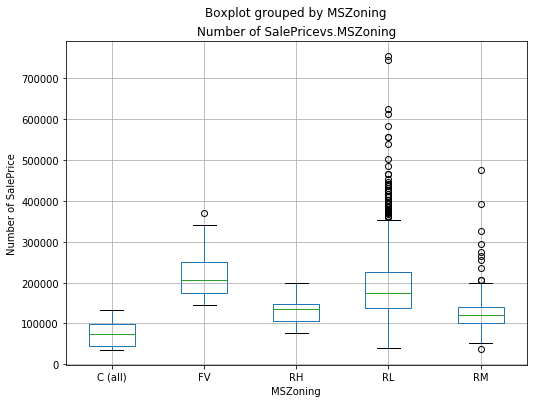

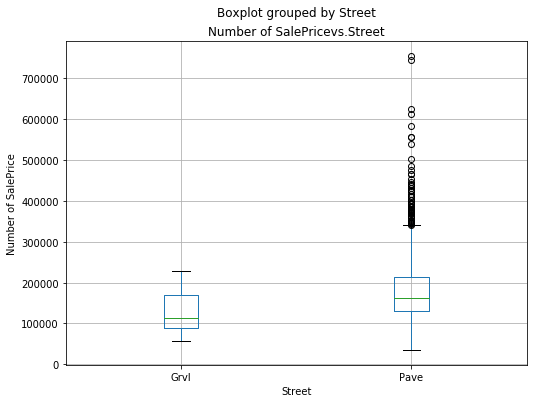

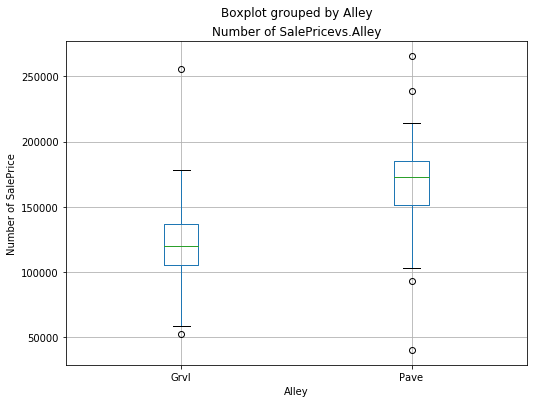

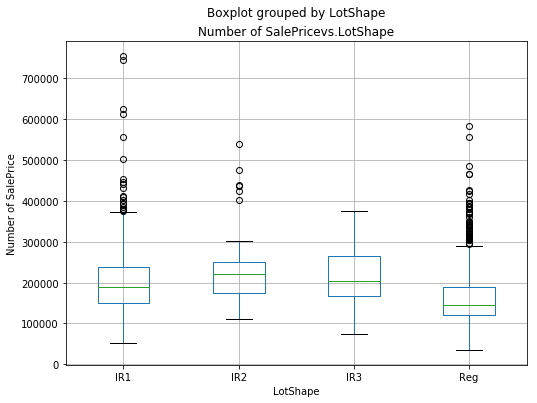

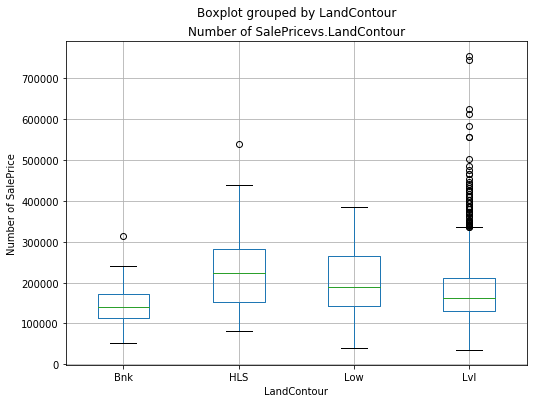

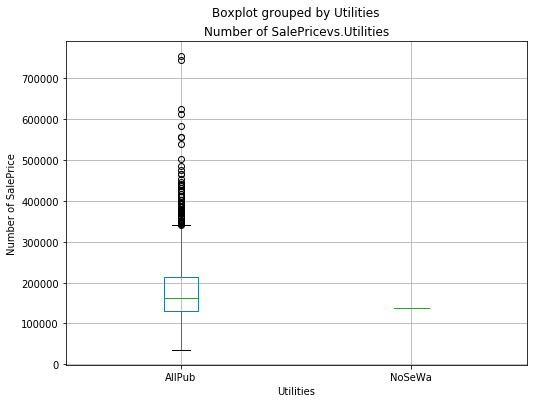

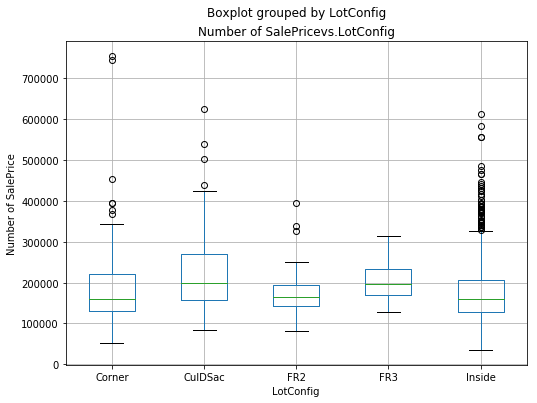

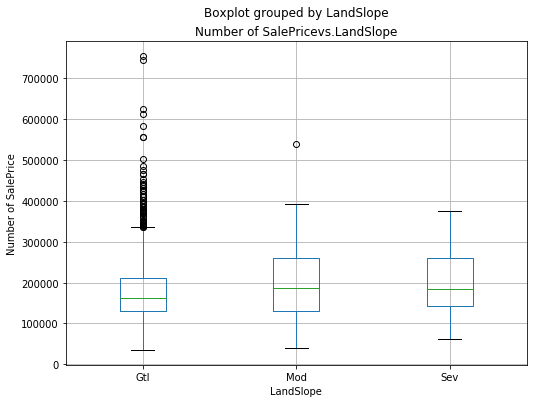

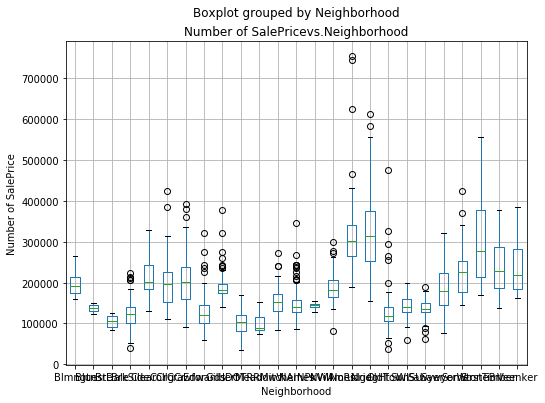

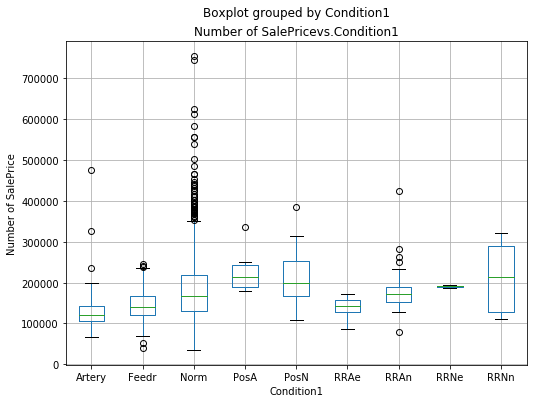

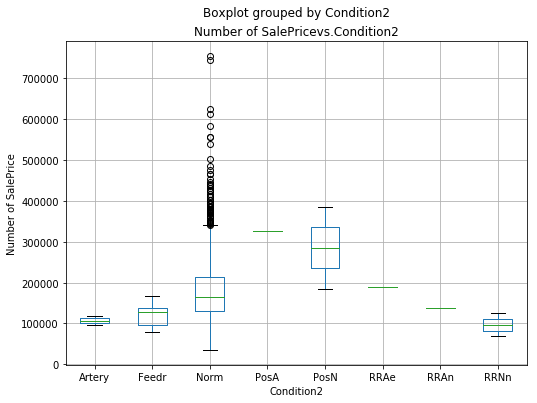

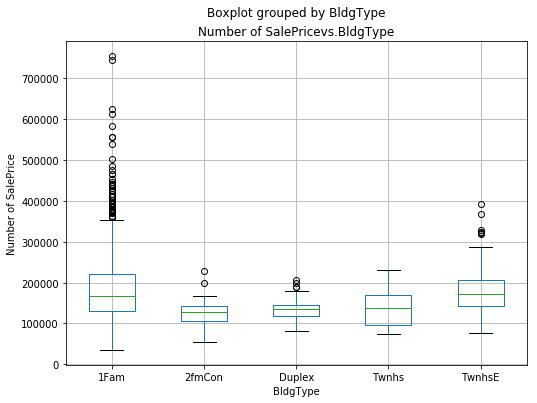

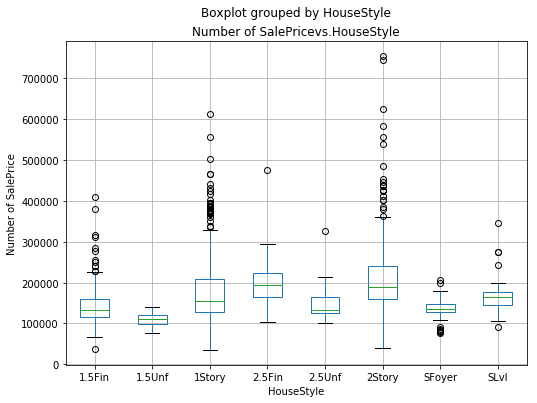

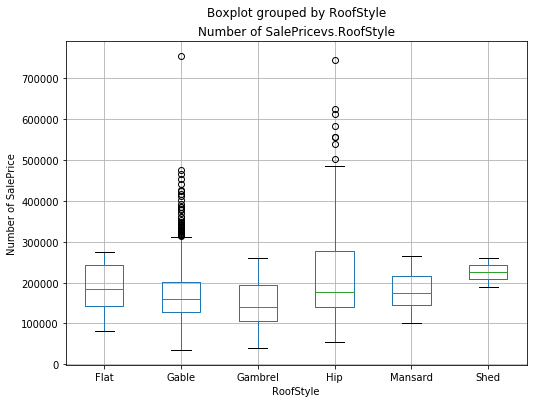

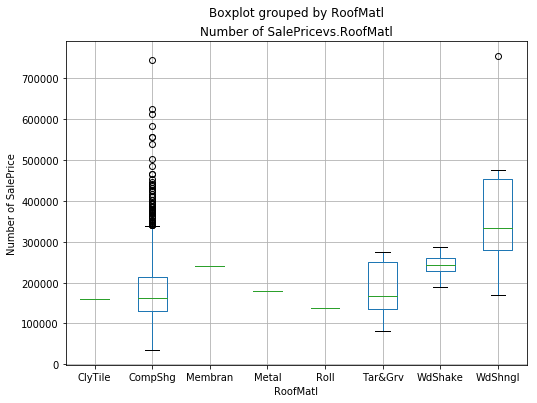

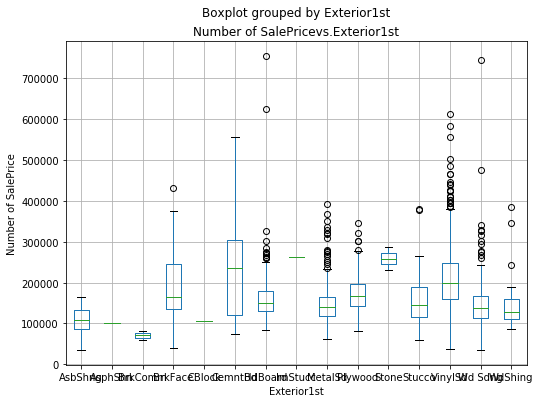

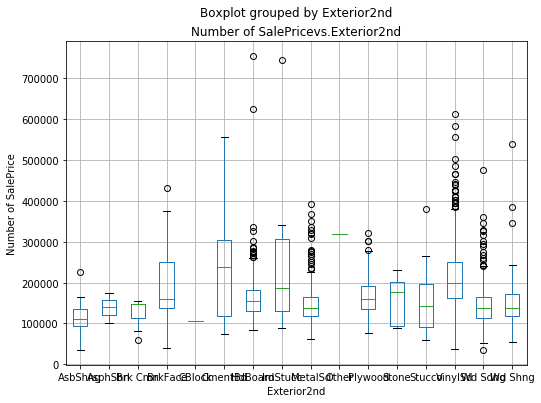

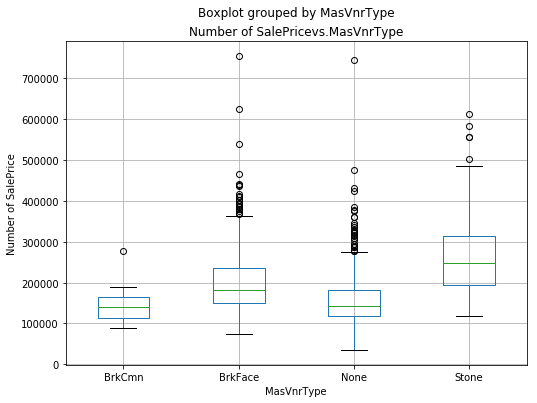

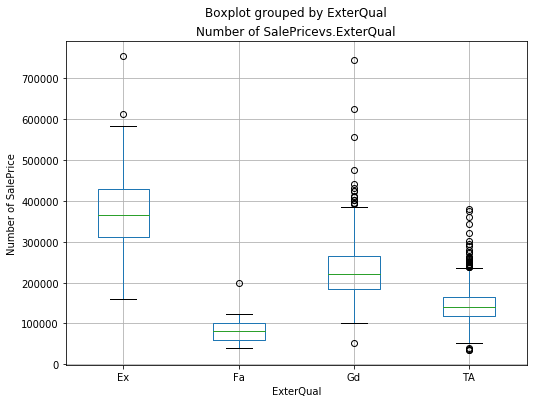

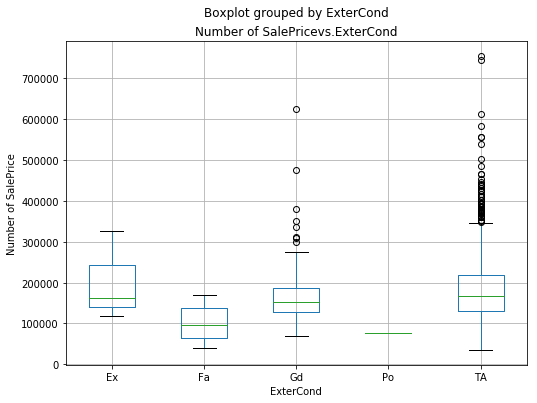

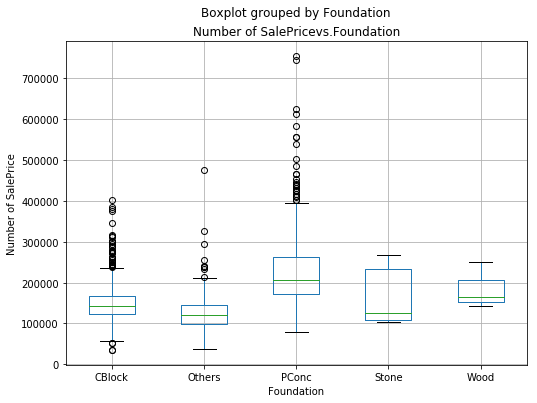

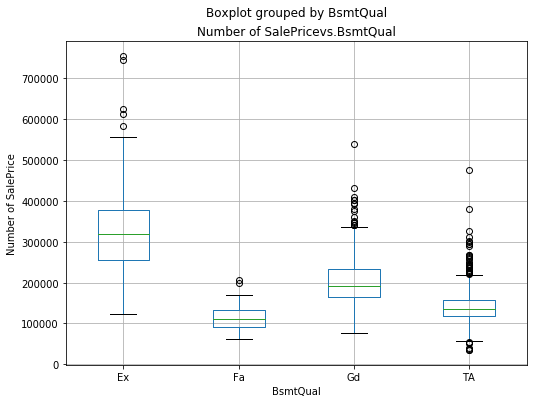

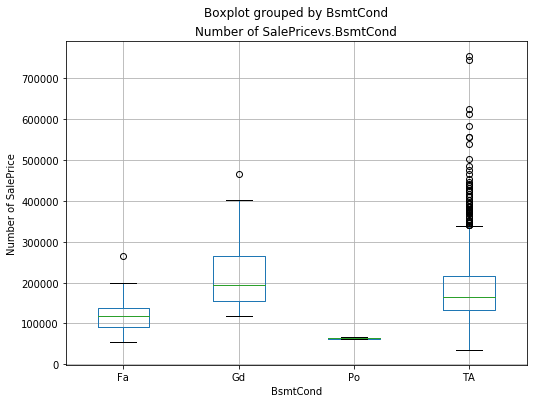

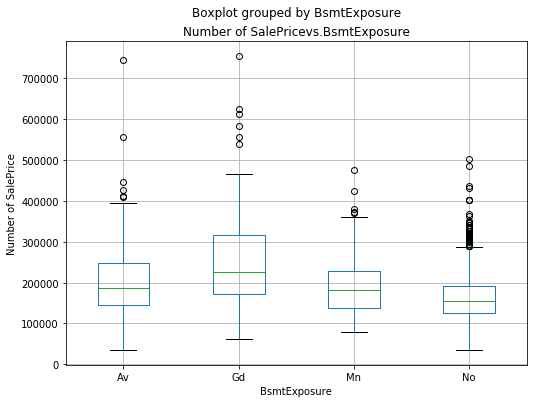

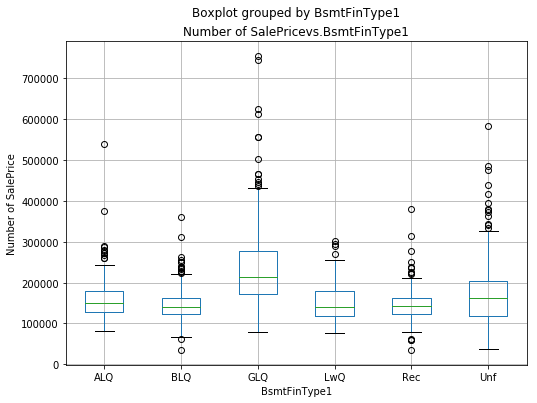

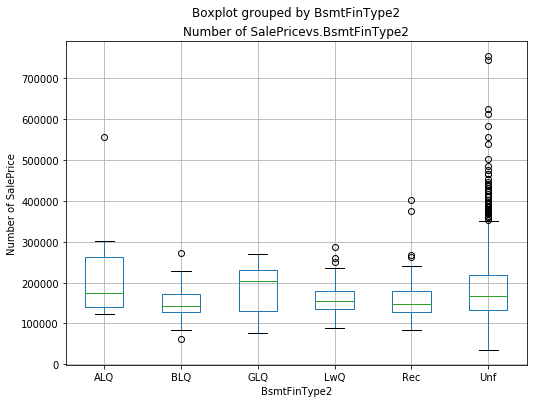

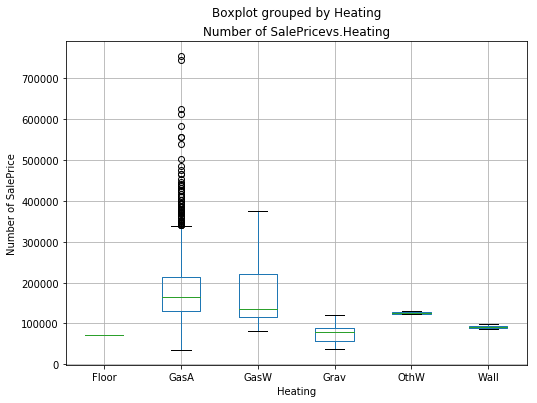

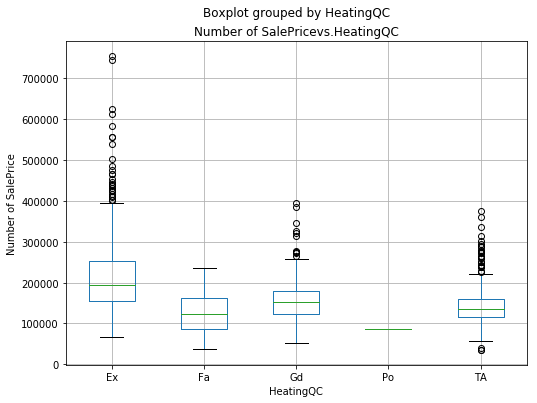

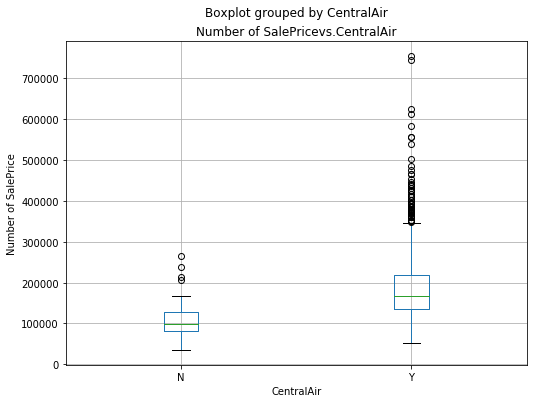

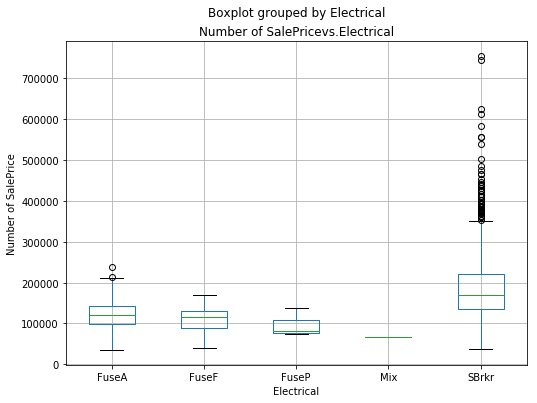

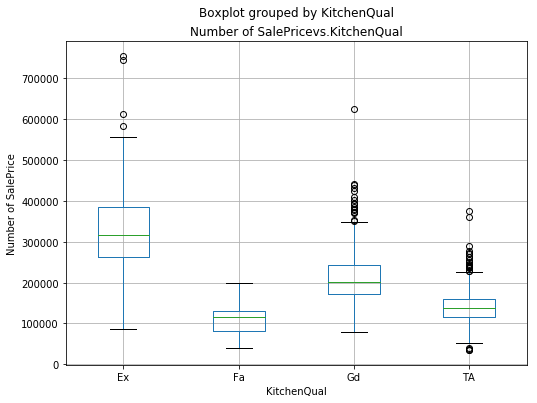

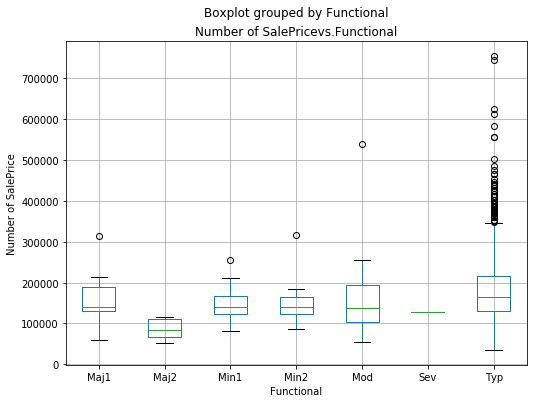

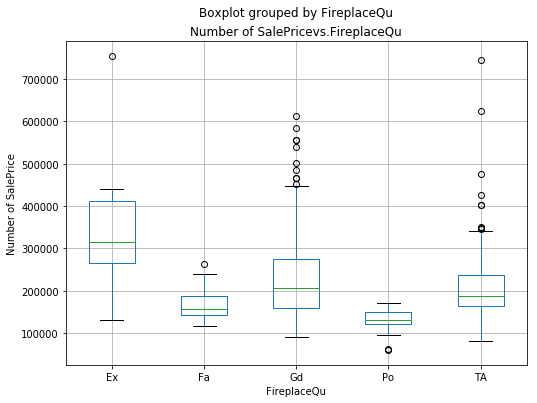

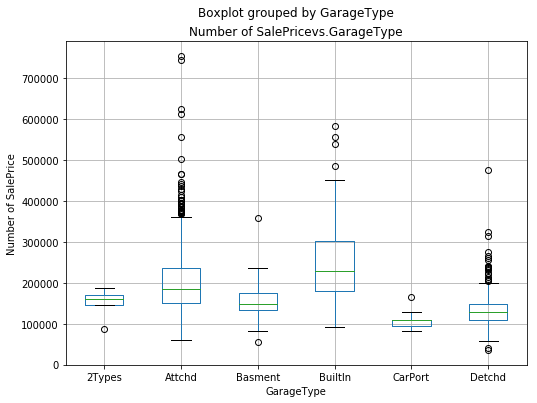

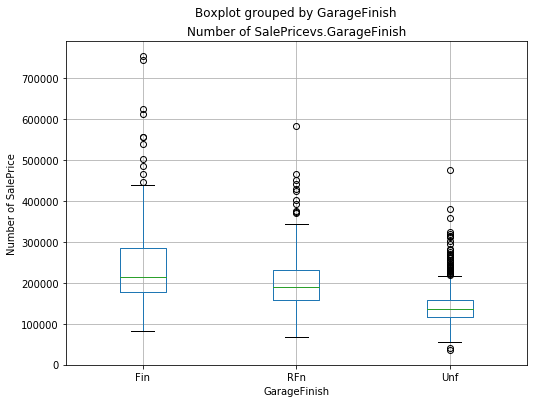

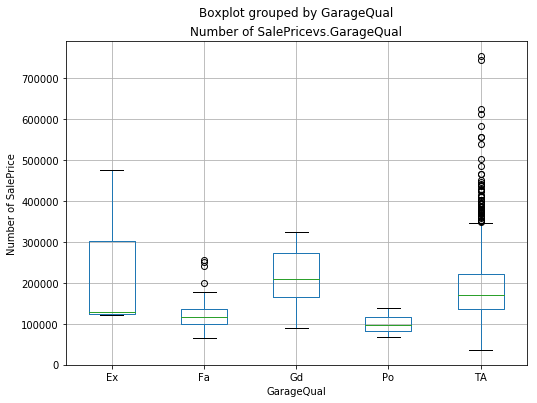

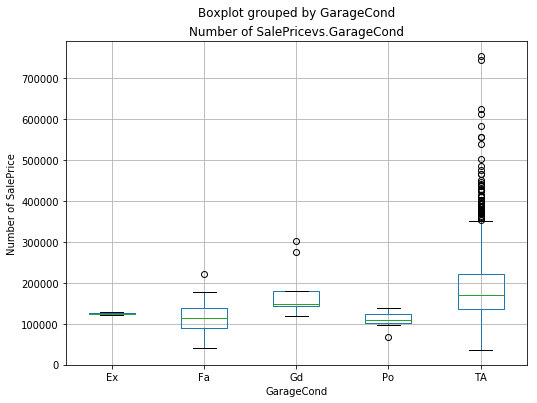

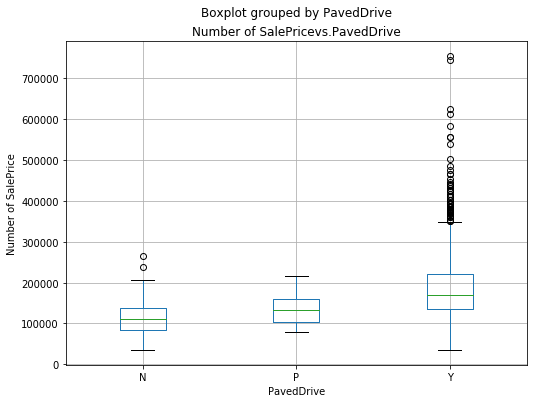

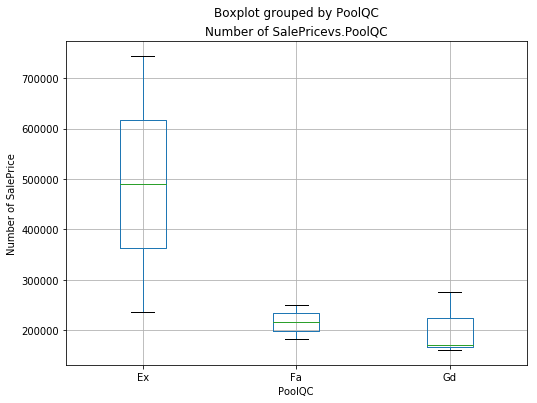

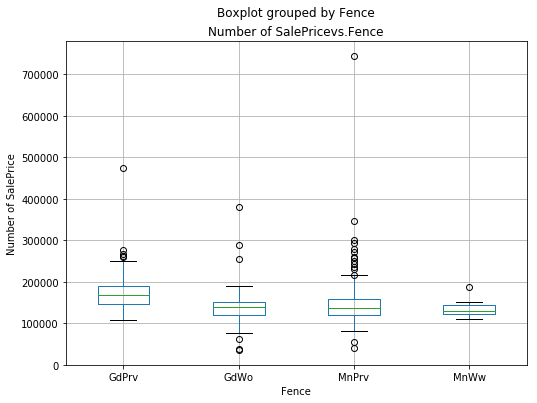

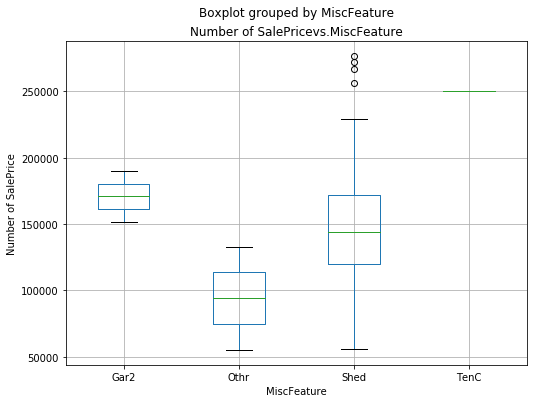

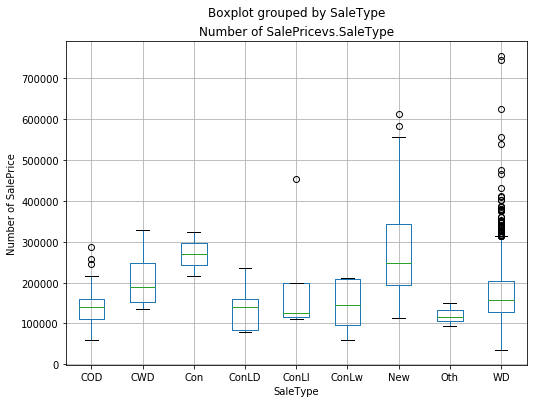

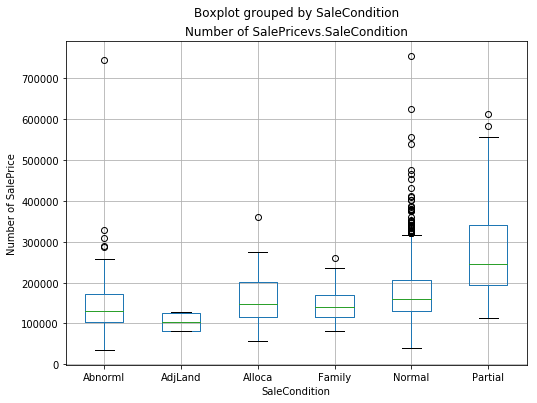

In [63]:
bike_box(df, cat_cols)


In [69]:
df['Foundation'] = df['Foundation'].replace(['PConc','Stone','Wood','Slab','CBlock','BrkTil'],['Pconc','Stone','Wood','Others','Others','Others'])


In [70]:
df.Foundation.unique()

array(['Pconc', 'Others', 'Wood', 'Stone'], dtype=object)

In [49]:
#num_cols = ['CWB_FORECAST_SUNSHINE_MINUTES', 'F_DAY1_MAXT_18pm','F_DAY1_MINT_18pm', 'F_DAY1_MAXMIN_18pm', 'F_DAY1_POP_18pm','F_DAY1_RH_18pm'] 
y = 'SalePrice'
      
def scatter(df, cols):
    import matplotlib.pyplot as plt
    import statsmodels.nonparametric.smoothers_lowess as lw
    
    ## Loop over the columns and create the scatter plots
    for col in cols:
        ## first compute a lowess fit to the data
        los = lw.lowess(df[y], df[col], frac = 0.3)
    
        ## Now make the plots
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df.plot(kind = 'scatter', x = col, y = y , ax = ax, alpha = 0.05)
        plt.plot(los[:, 0], los[:, 1], axes = ax, color = 'red')
        ax.set_xlabel(col)
        ax.set_ylabel('Number of ' + y)
        ax.set_title('Number of '+ y +' vs. ' + col)
        fig.show()
    return 'Done'   

C:\Users\chiku\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\chiku\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\chiku\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\chiku\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\chiku\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently u

C:\Users\chiku\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\chiku\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\chiku\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


'Done'

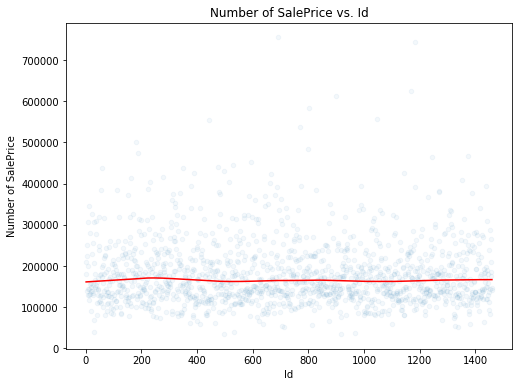

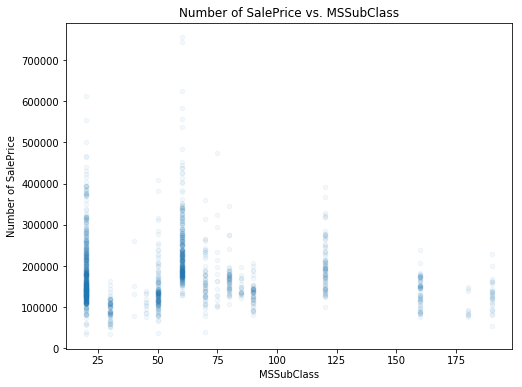

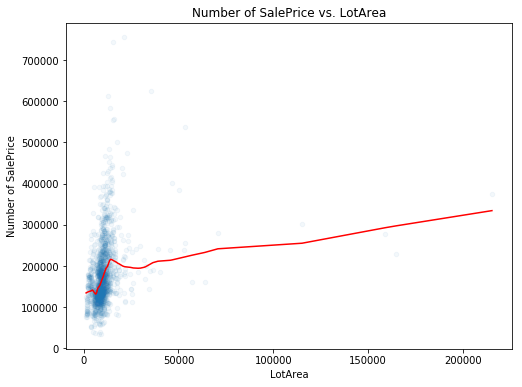

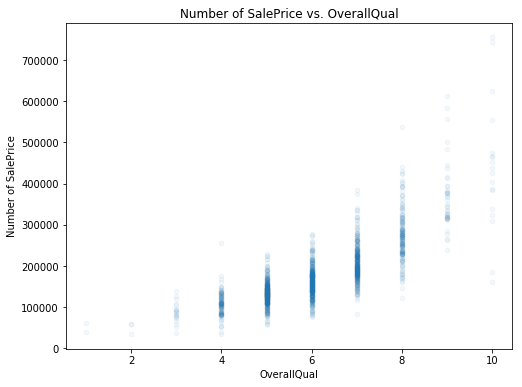

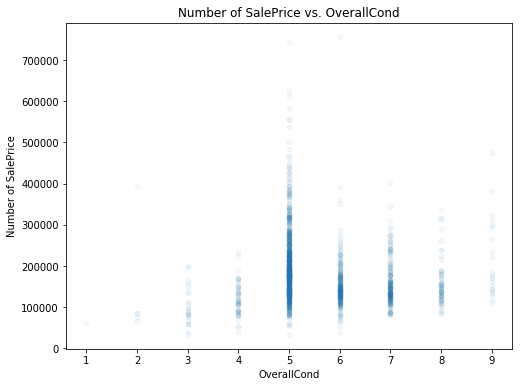

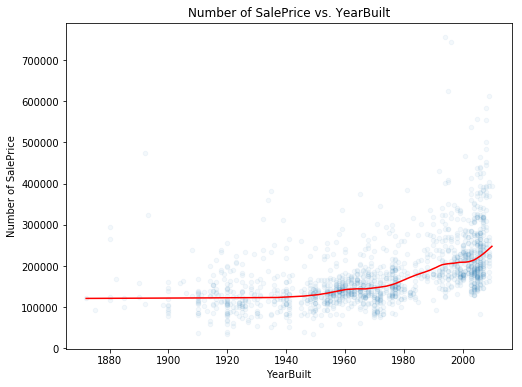

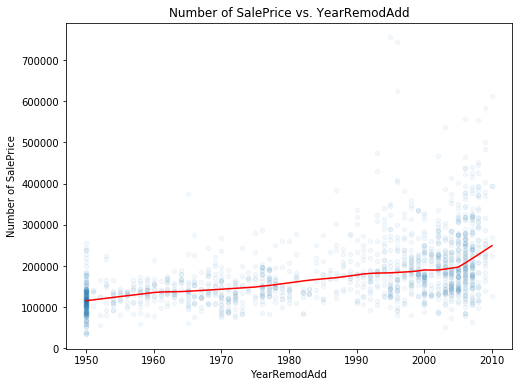

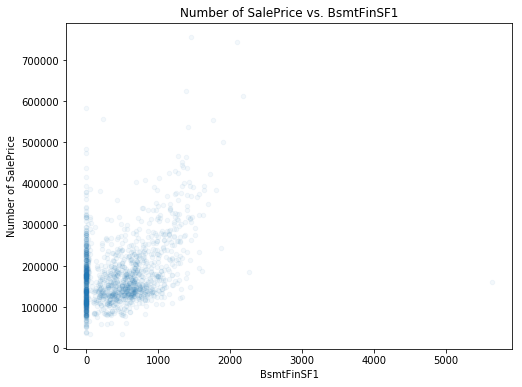

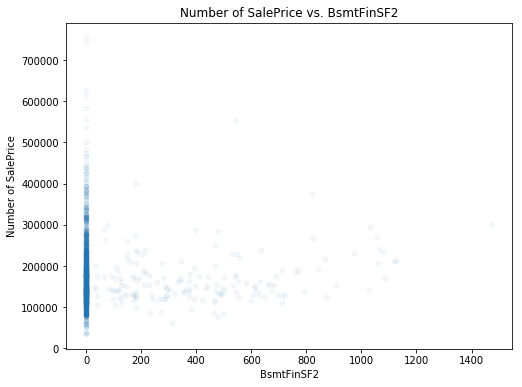

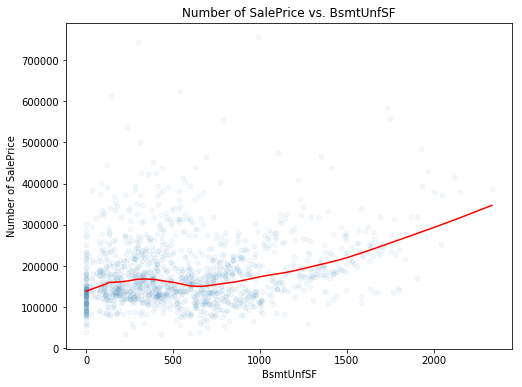

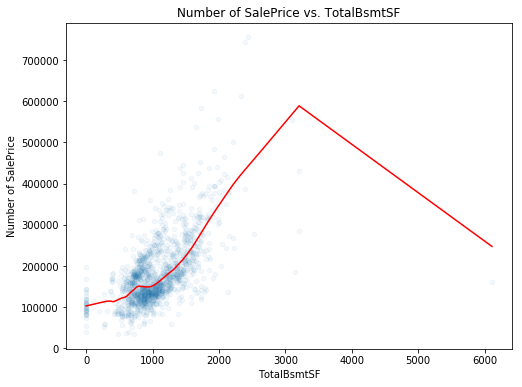

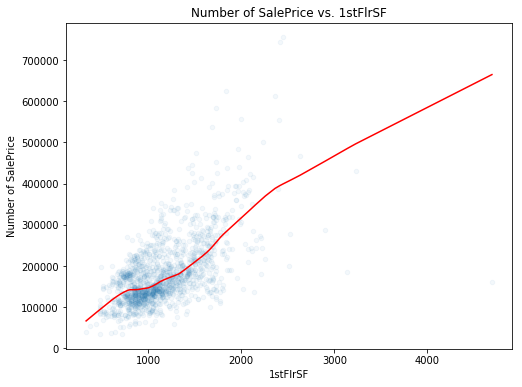

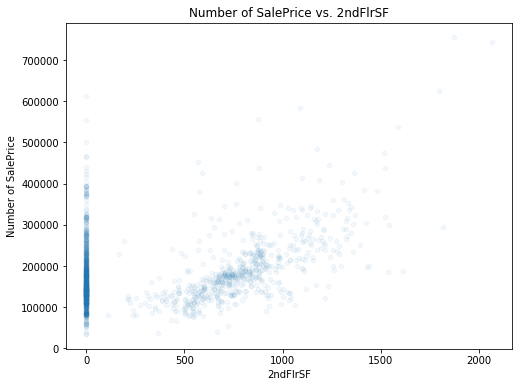

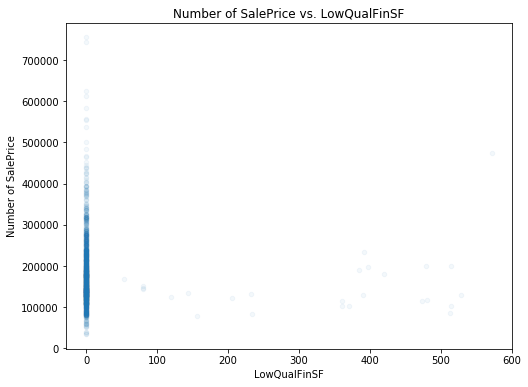

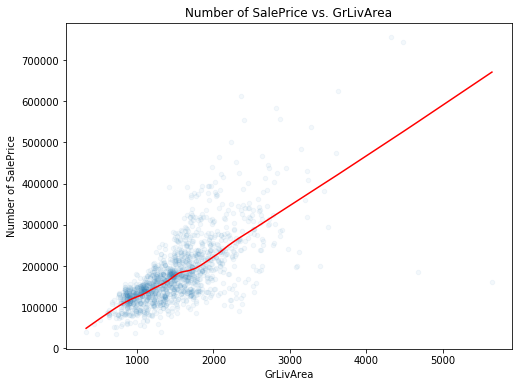

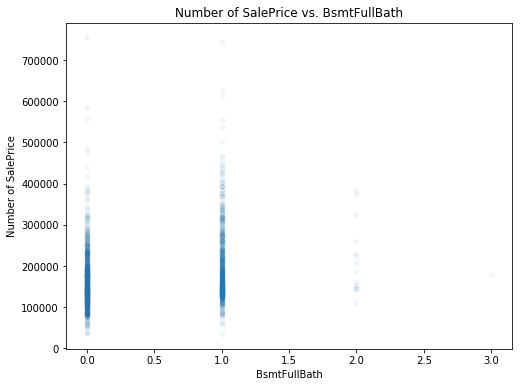

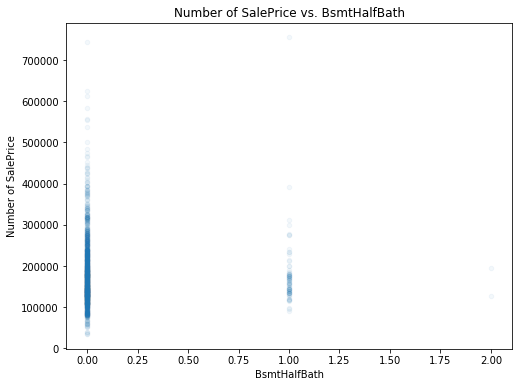

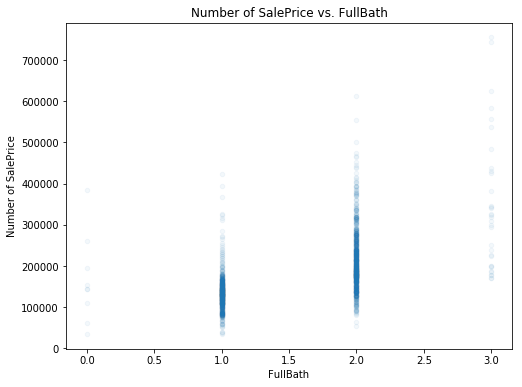

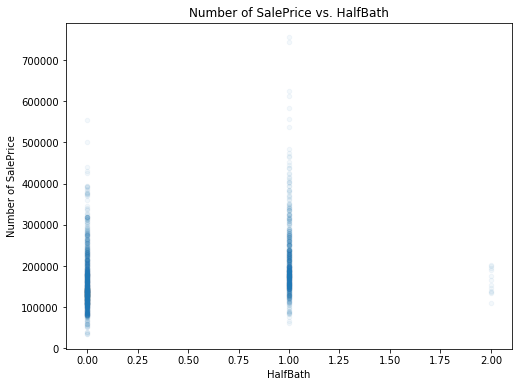

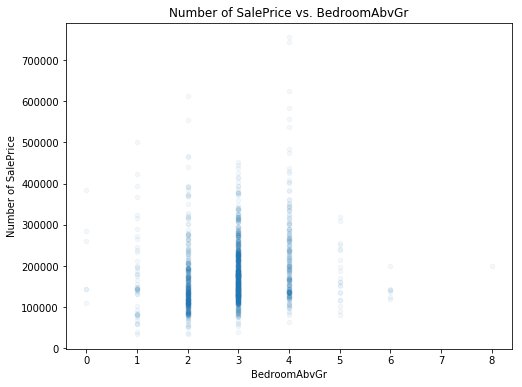

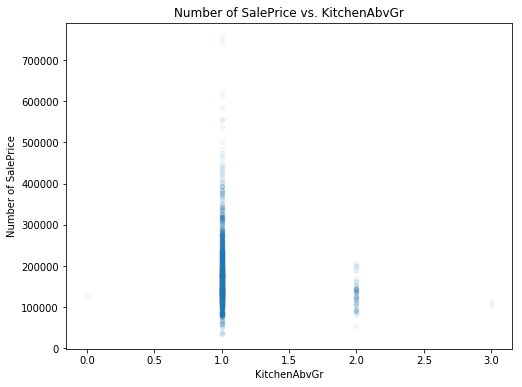

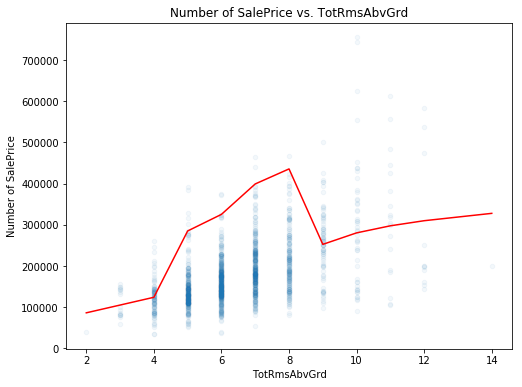

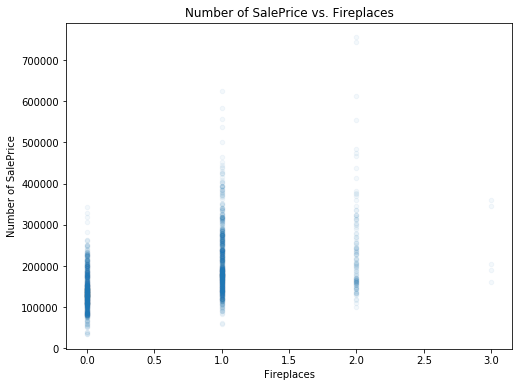

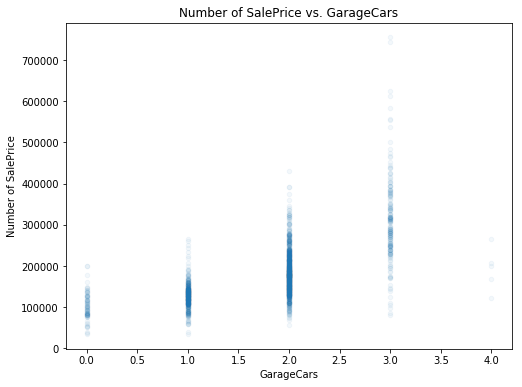

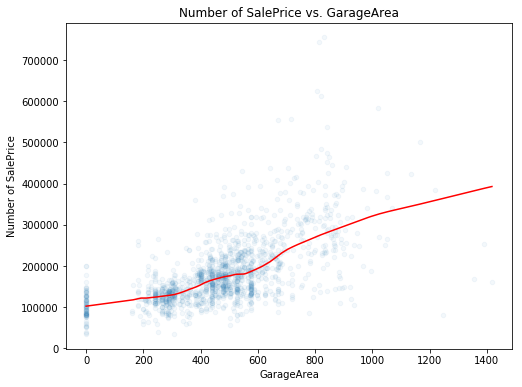

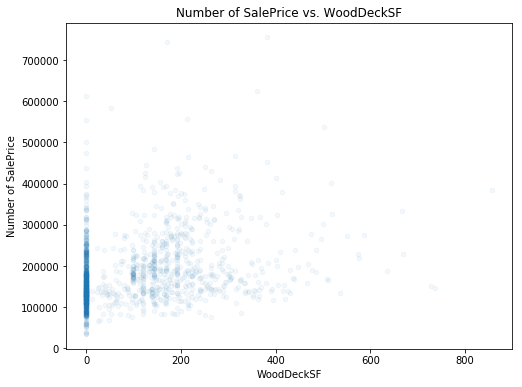

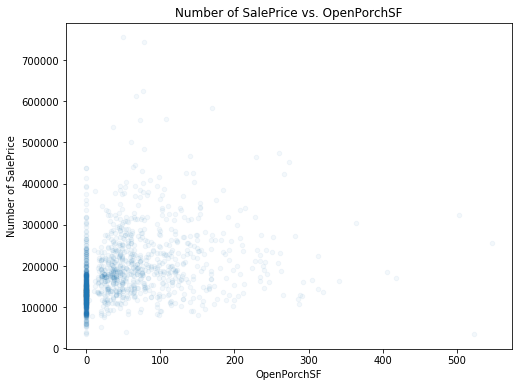

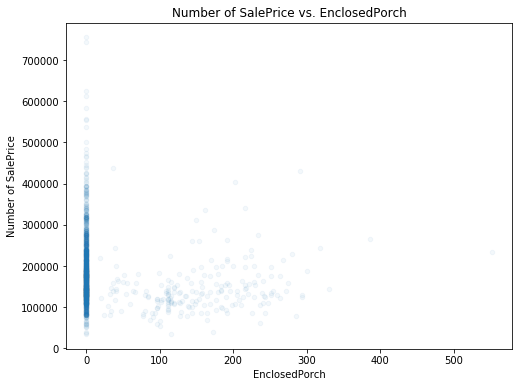

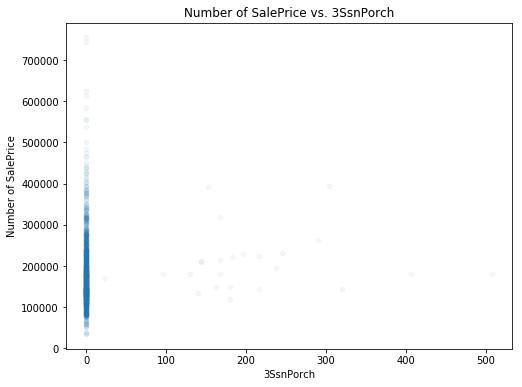

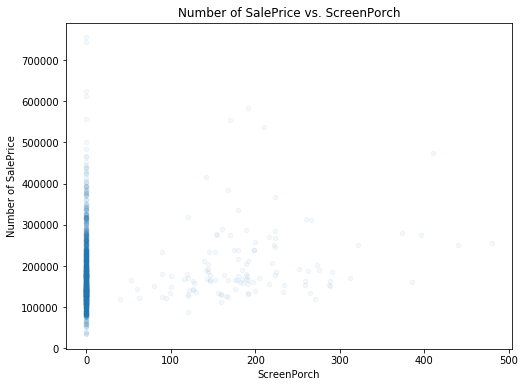

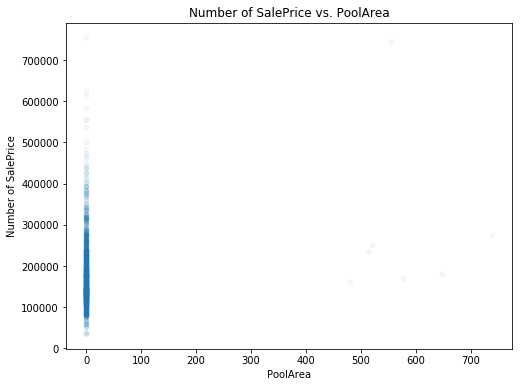

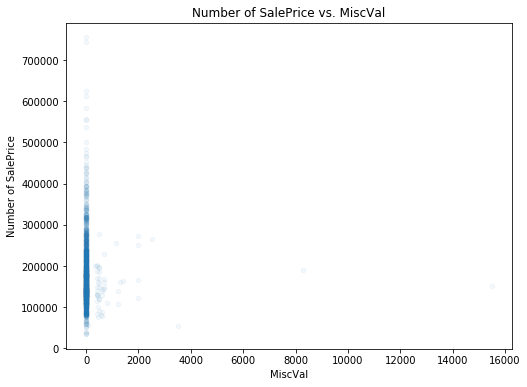

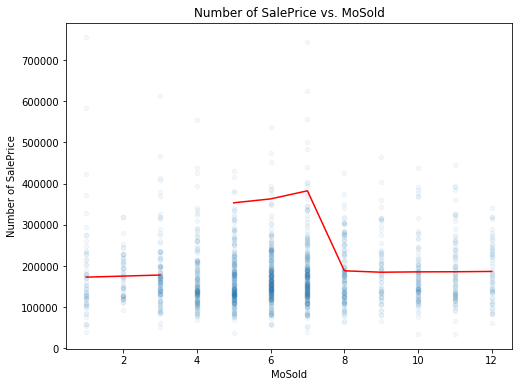

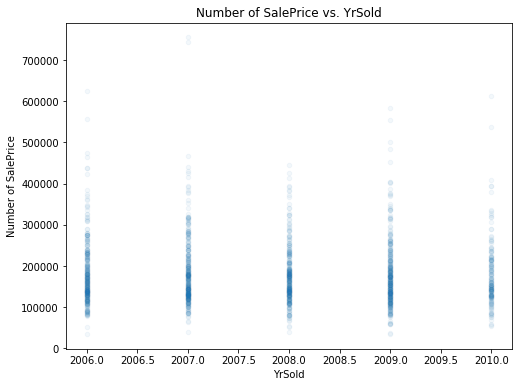

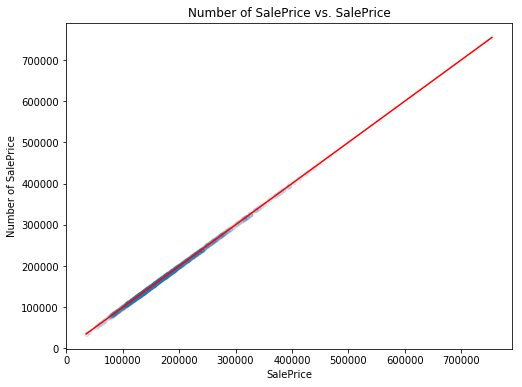

In [58]:
scatter(df, num_cols)

In [81]:
cat_select = ['Foundation','Neighborhood','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st']
df_result = pd.concat([ df[num_cols], pd.get_dummies(df[cat_select])],axis =1)

In [83]:
df_result

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,0,0,0,1,0,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,0,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,0,0,0,1,0,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,0,0,0,0,1,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,0,0,0,1,0,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,0,0,0,0,1,0,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,0,0,0,0,1,0,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,1,0,0,0,0,0,0,0,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,0,0,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,0,0
